In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import get_cmap


In [7]:
def plot_with_confidence_interval(x_values, y_mean, conf, color, marker, y_label, title, save_path):
    #calcolo l'intervallo di confidenza
    

    # Genera il grafico con l'intervallo di confidenza
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(x_values, y_mean, yerr=conf, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    plt.tight_layout()
    # plt.savefig(save_path)
    plt.show()

    
def plot_with_confidence_interval_log(x_values, y_mean, conf, color, marker, y_label, title, save_path):
    
    # Genera il grafico con l'intervallo di confidenza
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(x_values, y_mean, yerr=conf, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    ax.set_xscale('log', base=2)
    plt.tight_layout()
    # plt.savefig(save_path)
    plt.show()
    
def plot(x_values, y_mean, color, marker, y_label, title, save_path):
    # Genera il grafico
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x_values, y_mean, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    plt.tight_layout()
    # plt.savefig(save_path)
    plt.show()

# Funzione per leggere i dati e calcolare le statistiche

            
            

    

        
            

32 [0.0025715, 0.0025325, 0.00263805, 0.0026838, 0.00270062, 0.0029731, 0.00330308, 0.00427063, 0.00580222, 0.00899813, 0.0155947]
1 [1.42521e-05, 3.35004e-05, 8.59694e-05, 0.00020181, 0.000448895, 0.00104553, 0.00230568, 0.00526813, 0.0115397, 0.0254326, 0.0556019]
2 [0.000148822, 0.000147076, 0.000186799, 0.000259137, 0.00040395, 0.000797115, 0.00161663, 0.00336061, 0.00696843, 0.014484, 0.0309832]
16 [0.0011712, 0.00111169, 0.00113356, 0.00120077, 0.00130843, 0.00148861, 0.00197789, 0.00277496, 0.0044647, 0.00811364, 0.0149258]
4 [0.000434091, 0.000427552, 0.000417883, 0.000486474, 0.00055408, 0.000752838, 0.0011997, 0.00236908, 0.0046063, 0.00986259, 0.0197968]
8 [0.00067632, 0.000641113, 0.000643744, 0.00073683, 0.000784206, 0.000985184, 0.00140835, 0.00222535, 0.00410975, 0.00781639, 0.0147922]


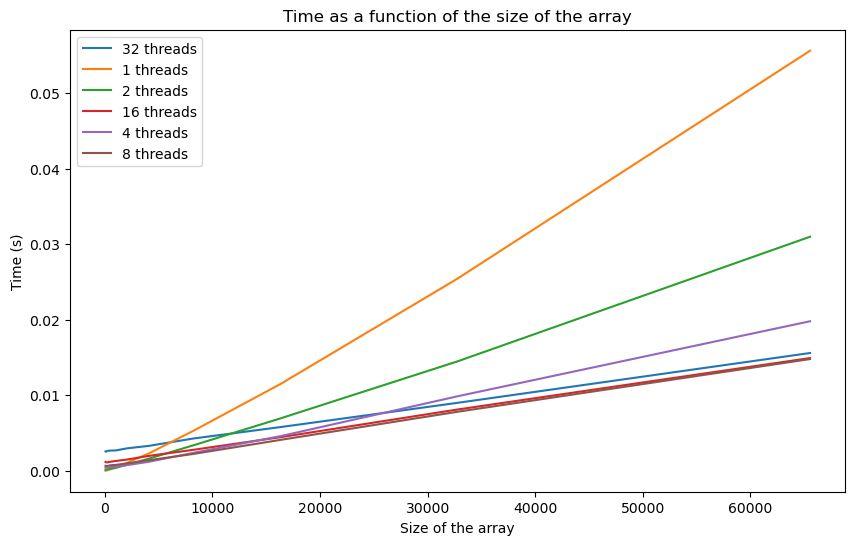

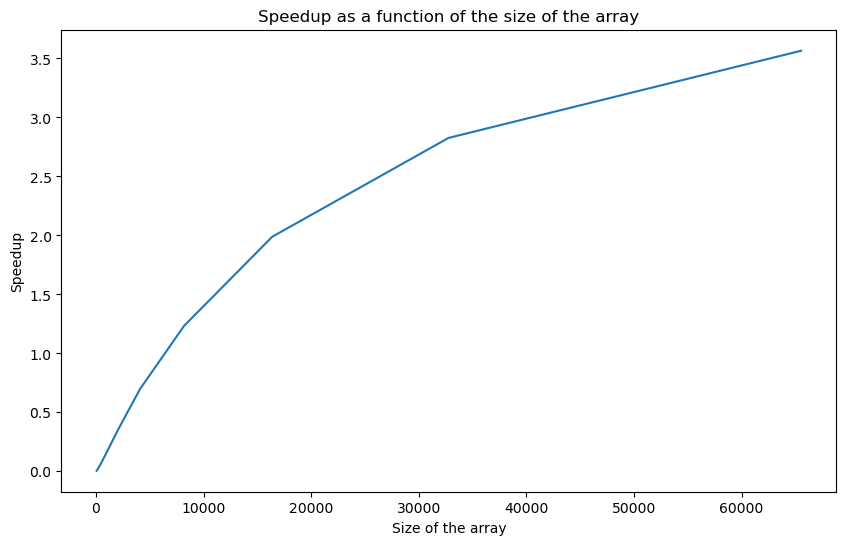

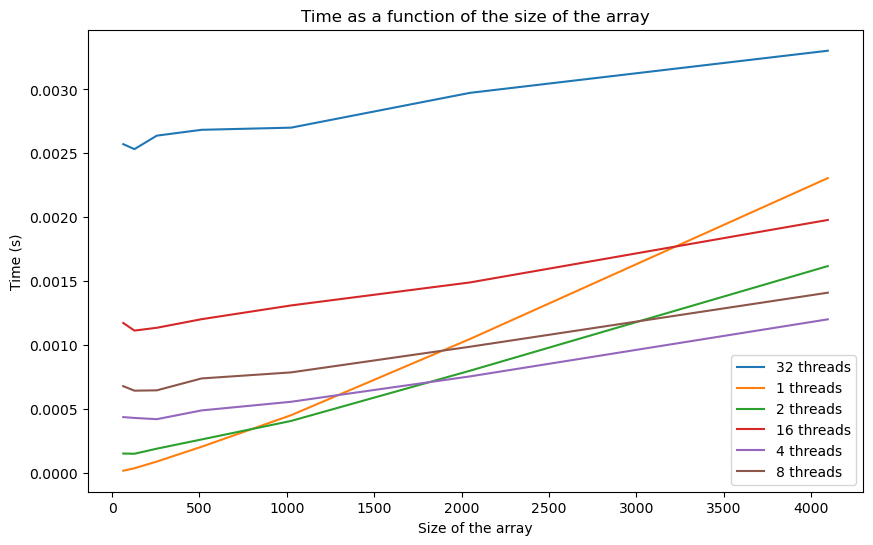

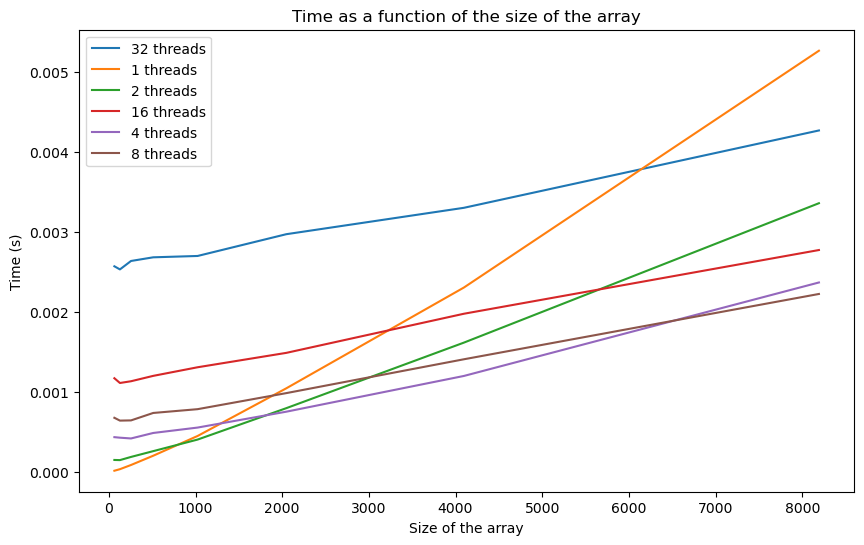

In [13]:

# Utilizzo della funzione per calcolare statistiche e generare il grafico

#print(path)
repetitions = 30

with open("./src/results/report.txt") as f:
    lines = f.readlines()[1:]

#each thread has its own list of measures, relative to the size of the array
"""int len[] = [64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536];
    int threads[] = {1, 2, 4, 8, 16, 32};
    int numTrials = 30; """

# Initialize the measurements dictionary
measurements = {}

# Sample array lengths and thread counts
array_lengths = [64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
threads = [1, 2, 4, 8, 16, 32]

with open("./src/results/report.txt") as f:
    lines = f.readlines()[1:]

# Initialize the measurements dictionary
measures = {}
measures["size"] = {}
measures["time"] = {}

threads = {1, 2, 4, 8, 16, 32}

for i in threads:
    measures["size"][i] = []
    measures["time"][i] = []

with open("./src/results/report.txt") as f:
    lines = f.readlines()[1:]
    for line in lines:
        tokens = line.split()
        size = int(tokens[0])
        thread = int(tokens[1])
        time = float(tokens[2])
        measures["size"][thread].append(size)
    
        measures["time"][thread].append(time)





#plot every thread in the same plot
fig = plt.figure(figsize=(10, 6))

#take only the first half on threads
t = list(threads)[:len(threads)//2]



for i in threads:
    #mean time for every size
    print(i, measures["time"][i])
    
    #plot the times as a function of the size of the array
    plt.plot(measures["size"][i], measures["time"][i], label=f"{i} threads")

plt.xlabel("Size of the array")
plt.ylabel("Time (s)")
plt.title("Time as a function of the size of the array")
plt.legend()
plt.show()

#state for which size the thread 1 is faster than every other thread

for i in range(len(measures["size"][1])):
    size = measures["size"][1][i]
    time = measures["time"][1][i]
    for j in t:
        if time < min(measures["time"][j][i] for j in t):
            print(f"Thread 1 is faster than every other thread for size {size}")
            break

#plot the speedup of the program as a function of the number of threads
fig = plt.figure(figsize=(10, 6))
speedup = [measures["time"][1][i]/measures["time"][32][i] for i in range(len(measures["time"][1]))]
plt.plot(measures["size"][1], speedup)
plt.xlabel("Size of the array")
plt.ylabel("Speedup")
plt.title("Speedup as a function of the size of the array")
plt.show()

#plot for the first 6 sizes
fig = plt.figure(figsize=(10, 6))
for i in threads:
    plt.plot(measures["size"][i][:7], measures["time"][i][:7], label=f"{i} threads")
plt.xlabel("Size of the array")
plt.ylabel("Time (s)")
plt.title("Time as a function of the size of the array")
plt.legend()
plt.show()

fig = plt.figure(figsize=(10, 6))
for i in threads:
    plt.plot(measures["size"][i][:8], measures["time"][i][:8], label=f"{i} threads")
plt.xlabel("Size of the array")
plt.ylabel("Time (s)")
plt.title("Time as a function of the size of the array")
plt.legend()
plt.show()




